In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv


# Import Libraries ---> Data Inspections ---> Data Cleaning ---> Summary Statistics ---> Data Visualization --> ML Predict if needed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv')

In [4]:
data.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,29.0,Male,1.62,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,23.0,Female,1.50,55.0,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,22.0,Male,1.64,53.0,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,24.0,Male,1.78,64.0,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
9,22.0,Male,1.72,68.0,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


In [5]:
data.tail(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2101,25.722004,Female,1.628470,107.218949,Sometimes,yes,3.0,3.0,no,no,2.487070,yes,0.067329,0.455823,Sometimes,Public_Transportation,Obesity_Type_III
2102,25.765628,Female,1.627839,108.107360,Sometimes,yes,3.0,3.0,no,no,2.320068,yes,0.045246,0.413106,Sometimes,Public_Transportation,Obesity_Type_III
2103,21.016849,Female,1.724268,133.033523,Sometimes,yes,3.0,3.0,no,no,1.650612,yes,1.537639,0.912457,Sometimes,Public_Transportation,Obesity_Type_III
2104,21.682367,Female,1.732383,133.043941,Sometimes,yes,3.0,3.0,no,no,1.610768,yes,1.510398,0.931455,Sometimes,Public_Transportation,Obesity_Type_III
2105,21.285965,Female,1.726920,131.335786,Sometimes,yes,3.0,3.0,no,no,1.796267,yes,1.728332,0.897924,Sometimes,Public_Transportation,Obesity_Type_III
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3.0,3.0,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

Data Cleaning

In [7]:
# check missing values

missing_values = data.isnull().sum()

In [8]:
missing_values

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
# check duplicates value

duplicates_rows = data[data.duplicated()]

In [10]:
duplicates_rows

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
98,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
106,25.0,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
179,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
184,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
209,22.0,Female,1.69,65.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,16.0,Female,1.66,58.0,no,no,2.0,1.0,no,no,1.0,no,0.0,1.0,Sometimes,Walking,Normal_Weight
460,18.0,Female,1.62,55.0,no,yes,2.0,3.0,no,no,1.0,yes,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
467,22.0,Male,1.74,75.0,no,yes,3.0,3.0,no,no,1.0,yes,1.0,0.0,Frequently,Automobile,Normal_Weight
496,18.0,Male,1.72,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [11]:
# remove duplicates value

data.drop_duplicates(inplace=True)

In [12]:
data

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [14]:
data.shape

(2087, 17)

Summary Statistics

In [15]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# Answer this question :

* family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "

* FAVC : Feature, Binary, " Do you eat high caloric food frequently? "

* FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "

* NCP : Feature, Continuous, " How many main meals do you have daily? "

* CAEC : Feature, Categorical, " Do you eat any food between meals? "

* SMOKE : Feature, Binary, " Do you smoke? "

* CH2O: Feature, Continuous, " How much water do you drink daily? "

* SCC: Feature, Binary, " Do you monitor the calories you eat daily? "

* FAF: Feature, Continuous, " How often do you have physical activity? "

* TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

* CALC : Feature, Categorical, " How often do you drink alcohol? "

* MTRANS : Feature, Categorical, " Which transportation do you usually use? "

* NObeyesdad : Target, Categorical, "Obesity level"

In [17]:
data.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [25]:
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 6.3 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=e8f05bd3f5f840be08547472d0e51028608a41b548e0b83ea63b598a0468bea7
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus


In [35]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from io import StringIO

# Initialize the DecisionTreeClassifier
age_tree = DecisionTreeClassifier(random_state=17)

age_tree.fit(data[["Age"]], data["family_history_with_overweight"])

# Export the decision tree to a dot file
dot_data = StringIO()
export_graphviz(age_tree, out_file=dot_data, feature_names=["Age"], filled=False)

# Convert the dot file to a PNG image
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("topic3_decision_tree2.png")

True

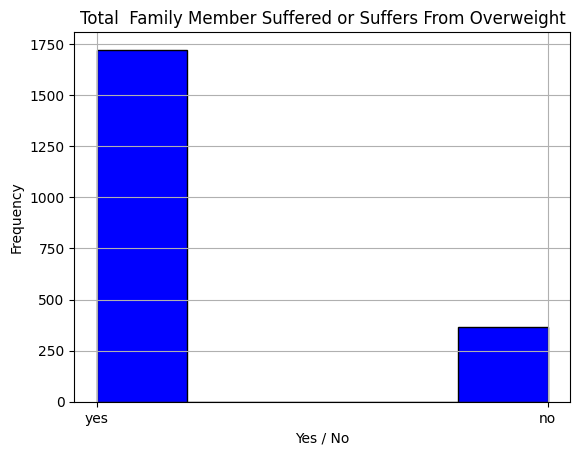

In [51]:
# Plot a histogram for Total  Family Member Suffered or Suffers From Overweight 

plt.hist(data['family_history_with_overweight'], bins=5, color='blue', edgecolor='black')
plt.title('Total  Family Member Suffered or Suffers From Overweight')
plt.xlabel('Yes / No')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q1 : Has a family member suffered or suffers from overweight?

# Answer : True

In [36]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from io import StringIO

# Initialize the DecisionTreeClassifier
age_tree = DecisionTreeClassifier(random_state=17)

age_tree.fit(data[["Age"]], data["FAVC"])

# Export the decision tree to a dot file
dot_data = StringIO()
export_graphviz(age_tree, out_file=dot_data, feature_names=["Age"], filled=False)


# Convert the dot file to a PNG image
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("topic2_decision_tree2.png")

True

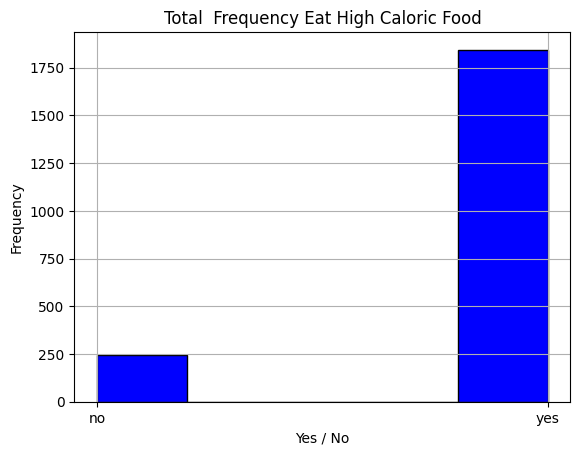

In [50]:
# Plot a histogram for Total  Frequency Eat High Caloric Food

plt.hist(data['FAVC'], bins=5, color='blue', edgecolor='black')
plt.title('Total  Frequency Eat High Caloric Food')
plt.xlabel('Yes / No')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q2 : Do you eat high caloric food frequently?

# Answer : True / Yes

In [43]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from io import StringIO

# Initialize the DecisionTreeClassifier
fcvc_tree = DecisionTreeClassifier(random_state=17)

fcvc_tree.fit(data[["FCVC"]], data["family_history_with_overweight"])

# Export the decision tree to a dot file
dot_data = StringIO()
export_graphviz(fcvc_tree, out_file=dot_data, feature_names=["FCVC"], filled=False)

# Convert the dot file to a PNG image
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("topic3_decision_tree2.png")

True

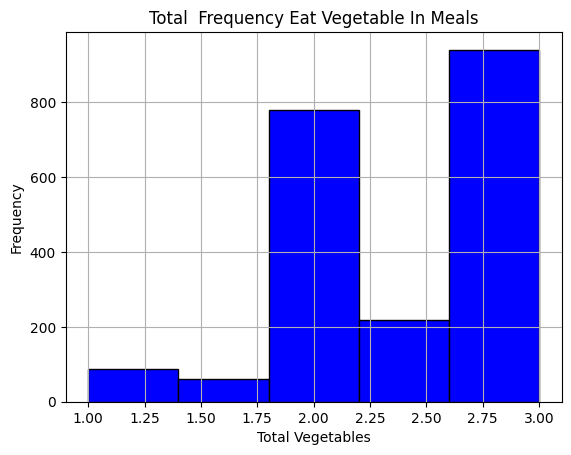

In [67]:
# Plot a histogram for Total  Frequency Eat Vegetable In Meals

plt.hist(data['FCVC'], bins=5, color='blue', edgecolor='black')
plt.title('Total  Frequency Eat Vegetable In Meals')
plt.xlabel('Total Vegetables')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q3 : Do you usually eat vegetables in your meals?

# Answer : True

In [55]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from io import StringIO

# Initialize the DecisionTreeClassifier
ncp_tree = DecisionTreeClassifier(random_state=17)

ncp_tree.fit(data[["NCP"]], data["family_history_with_overweight"])

# Export the decision tree to a dot file
dot_data = StringIO()
export_graphviz(ncp_tree, out_file=dot_data, feature_names=["NCP"], filled=False)

# Convert the dot file to a PNG image
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("topic3_decision_tree2.png")

True

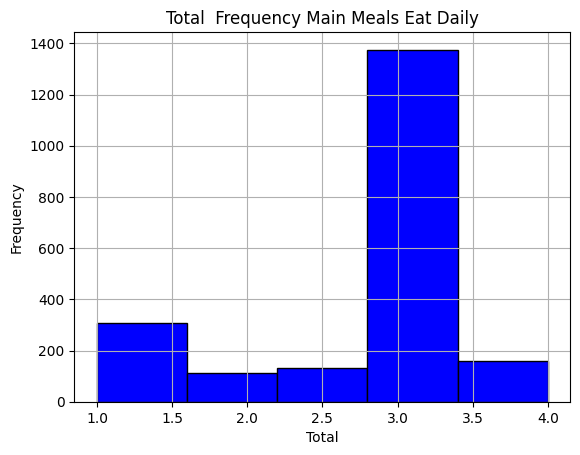

In [53]:
# Plot a histogram for Total  Frequency Main Meals Eat Daily

plt.hist(data['NCP'], bins=5, color='blue', edgecolor='black')
plt.title('Total  Frequency Main Meals Eat Daily')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q4 : How many main meals do you have daily?

# Answer : 3.0 / True

In [59]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from io import StringIO

# Initialize the DecisionTreeClassifier
ncp_tree = DecisionTreeClassifier(random_state=17)

ncp_tree.fit(data[["Age"]], data["CAEC"])

# Export the decision tree to a dot file
dot_data = StringIO()
export_graphviz(ncp_tree, out_file=dot_data, feature_names=["Age"], filled=False)

# Convert the dot file to a PNG image
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("topic3_decision_tree2.png")

True

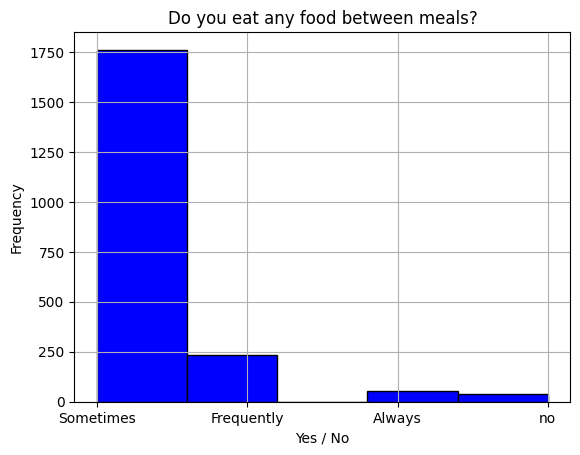

In [64]:
# Plot a histogram for do you eat any food between meals?

plt.hist(data['CAEC'], bins=5, color='blue', edgecolor='black')
plt.title('Do you eat any food between meals?')
plt.xlabel('Yes / No')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q5 : Do you eat any food between meals?

# Answer : Sometimes / True

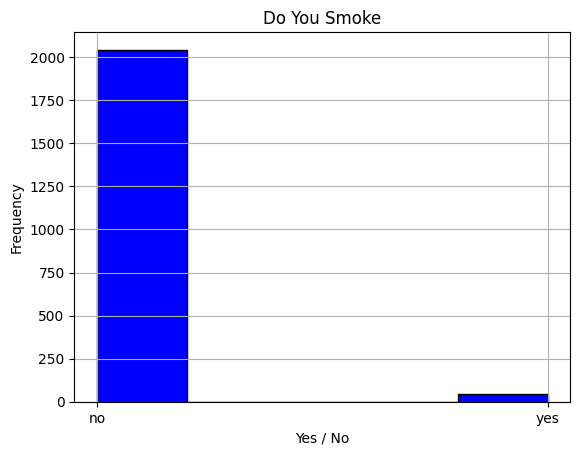

In [60]:
# Plot a histogram for Do You Smoke ?

plt.hist(data['SMOKE'], bins=5, color='blue', edgecolor='black')
plt.title('Do You Smoke ?')
plt.xlabel('Yes / No')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q6 : Do you smoke?

# Answer : No 

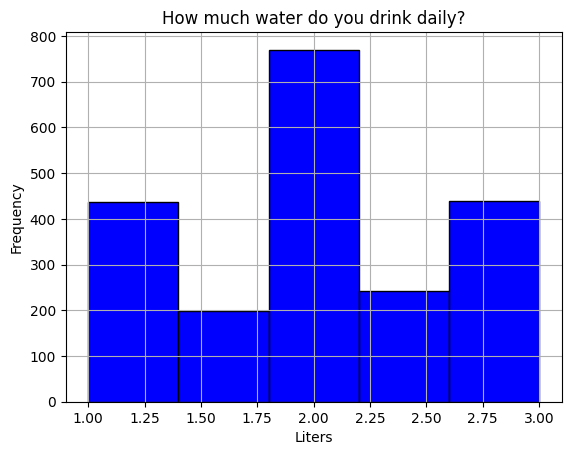

In [66]:
# Plot a histogram for how much water do you drink daily?

plt.hist(data['CH2O'], bins=5, color='blue', edgecolor='black')
plt.title('How much water do you drink daily?')
plt.xlabel('Liters')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q7 :  How much water do you drink daily?

# Answer :  2.0

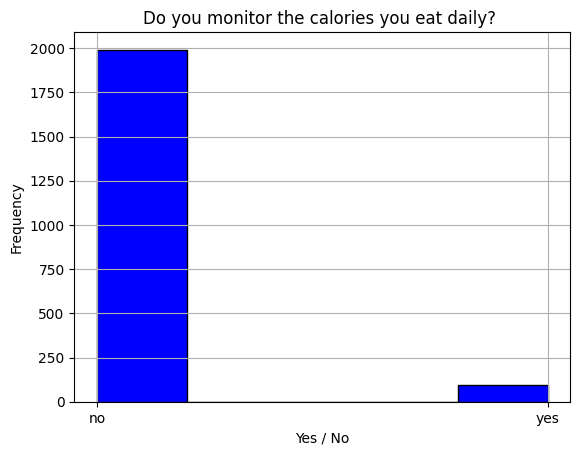

In [68]:
# Plot a histogram for do you monitor the calories you eat daily? 

plt.hist(data['SCC'], bins=5, color='blue', edgecolor='black')
plt.title('Do you monitor the calories you eat daily? ')
plt.xlabel('Yes / No')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#  Q8 : Do you monitor the calories you eat daily?

# Answer : No

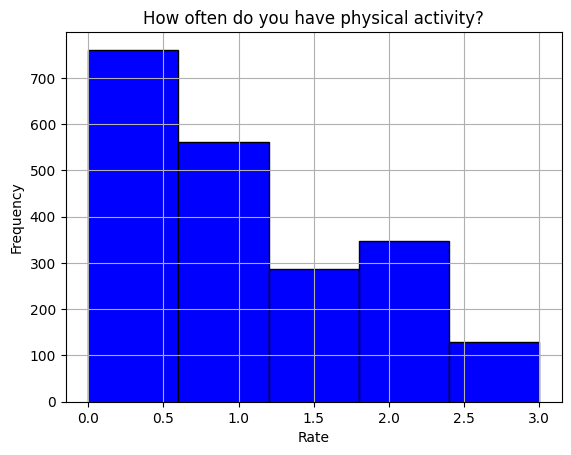

In [70]:
# Plot a histogram for how often do you have physical activity? 

plt.hist(data['FAF'], bins=5, color='blue', edgecolor='black')
plt.title('How often do you have physical activity?')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q9 : How often do you have physical activity?

# Answer : 0.5 / Sometimes

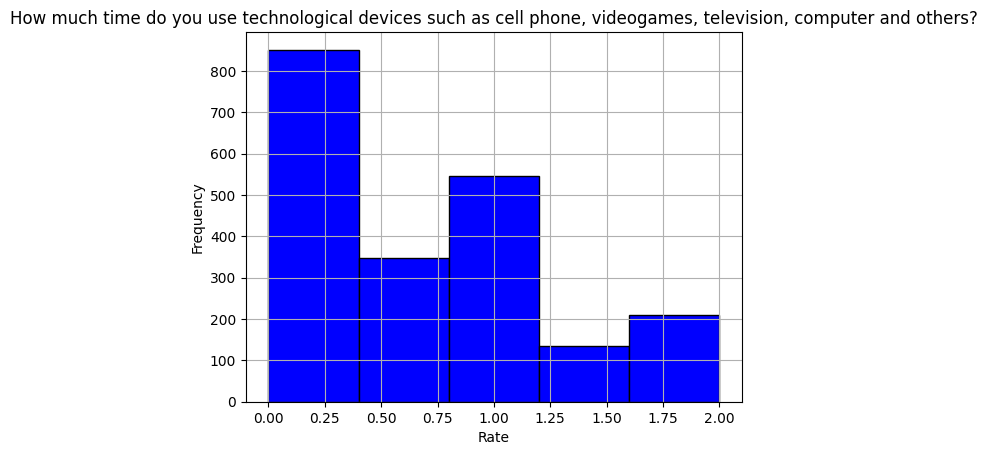

In [72]:
# Plot a histogram for how much time do you use technological devices such as cell phone, videogames, television, computer and others? 

plt.hist(data['TUE'], bins=5, color='blue', edgecolor='black')
plt.title('How much time do you use technological devices such as cell phone, videogames, television, computer and others?')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q10 : How much time do you use technological devices such as cell phone, videogames, television, computer and others?

# Answer : 0.0 - 0.25

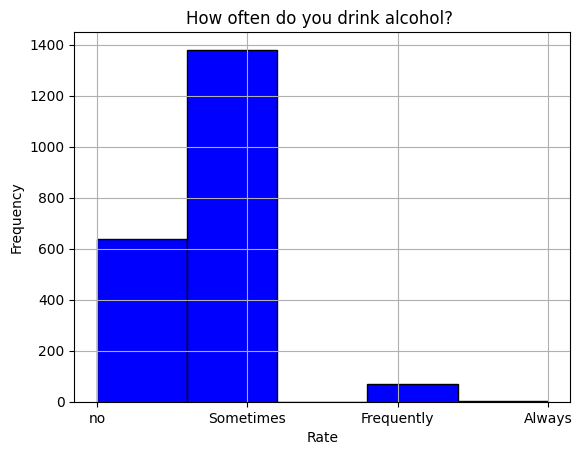

In [74]:
# Plot a histogram for how often do you drink alcohol?

plt.hist(data['CALC'], bins=5, color='blue', edgecolor='black')
plt.title('How often do you drink alcohol? ')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q11 : How often do you drink alcohol?

# Answer : Sometimes

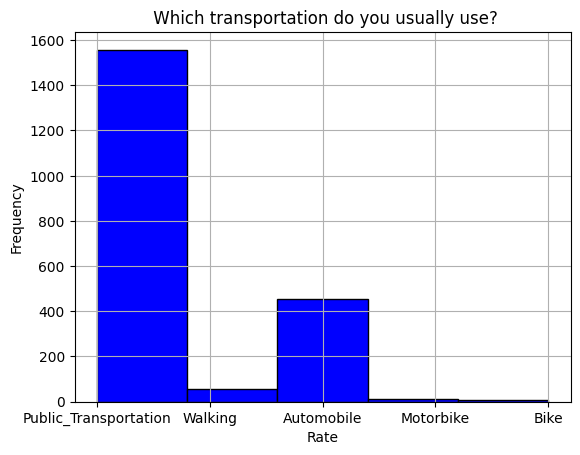

In [73]:
# Plot a histogram for which transportation do you usually use? 

plt.hist(data['MTRANS'], bins=5, color='blue', edgecolor='black')
plt.title(' Which transportation do you usually use?')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q12 : Which transportation do you usually use?

# Answer : Public Transportation